In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import *
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
%matplotlib inline


In [41]:
cars = pd.read_csv('cars_multi.csv')
#cars[[ 'cylinders','ID','model','origin','weight']] = cars[['cylinders','ID','model','origin','weight']].astype(float)


df=pd.DataFrame(cars)
df.head()

,ID,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [86]:

x=cars.loc[:,'mpg']
# y=cars['horsepower'].dtype
x.head()
# x.astype(int)

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [42]:
cars[cars.ID==33]

,ID,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
32,33,25.0,4,98.0,84,2046,19.0,71,1,ford pinto


In [45]:
df=pd.DataFrame(cars)
# df = df.drop('horsepower', 1)
df.head()

,ID,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [49]:
X = df.values[:,1:8]
y = df.values[:,8]
print X
print y

[[18.0 8 307.0 ..., 3504 12.0 70]
 [15.0 8 350.0 ..., 3693 11.5 70]
 [18.0 8 318.0 ..., 3436 11.0 70]
 ..., 
 [32.0 4 135.0 ..., 2295 11.6 82]
 [28.0 4 120.0 ..., 2625 18.6 82]
 [31.0 4 119.0 ..., 2720 19.4 82]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 3 2 2 2 2 2 1 1 1 1 1 3 1 3 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 3 2 1 3 1 2 1 1 1 1 1 1 1 1 1 1 1 3 1 1
 1 1 2 2 2 2 1 3 3 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 3 1 3
 3 1 1 2 1 1 2 2 2 2 1 2 3 1 1 1 1 1 3 1 3 1 1 1 1 1 1 1 1 1 2 2 2 3 3 1 2
 2 3 3 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 3 2 3 1 2 1 2 2 2 2 3 2 2 1
 1 2 1 1 1 1 1 1 1 1 1 1 2 3 1 1 1 1 2 3 3 1 2 1 2 3 2 1 1 1 1 3 1 2 1 3 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 3 1 1 1 3 2 3 2 3 2 1 3 3 3 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 3 3 1 3 1 1 3 2 2 2 2 2 3 1 1 1 1 1 1 1 1 1 1 1 1 1 2 3 1
 1 2 1 2 1 1 1 3 2 1 1 1 1 2 3 1 3 1 1 1 1 2 3 3 3 3 3 1 3 2 2 2 2 3 2 3 2
 3 3 2 1 3 1 1 1 1 1 3 1 3 3 3 3 3 1 1 1 2 2 3 3 3 3 2 2 3 3 1 1 1 1 1 1 1
 1 1 1 1 1 2 3 3 1 1 3 3 3 3 3 3 1 1 1

In [79]:
from sklearn.metrics import confusion_matrix
dt = DecisionTreeClassifier(max_depth=5)
sv = SVC()
lr = LogisticRegression()
rd= RandomForestClassifier()


X = df.values[:,1:8]
y = df.values[:,8]
y=y.astype('int')
test_size = 0.5
Xtr, Xts, ytr, yts = train_test_split(X,y, test_size=test_size)

rd.fit(Xtr,ytr)
print "Random Forest"
print "acierto en train", rd.score(Xtr,ytr)
print "acierto en test ", rd.score(Xts,yts)

predicciones_train = rd.predict(Xtr)
predicciones_test  = rd.predict(Xts)

cm_train=confusion_matrix(ytr, predicciones_train)
cm_test = confusion_matrix(yts, predicciones_test)
print "matrix de confusión en train\n", cm_train
print "matrix de confusión en test\n", cm_test

lr.fit(Xtr,ytr)
print "Logistic Regrssion"
print "acierto en train", lr.score(Xtr,ytr)
print "acierto en test ", lr.score(Xts,yts)

dt.fit(Xtr,ytr)
print "Decision Tree"
print "acierto en train", dt.score(Xtr,ytr)
print "acierto en test ", dt.score(Xts,yts)


Random Forest
acierto en train 0.994974874372
acierto en test  0.798994974874
matrix de confusión en train
[[124   0   0]
 [  0  34   0]
 [  1   0  40]]
matrix de confusión en test
[[119   3   3]
 [ 12  18   6]
 [  7   9  22]]
Logistic Regrssion
acierto en train 0.773869346734
acierto en test  0.768844221106
Decision Tree
acierto en train 0.884422110553
acierto en test  0.798994974874


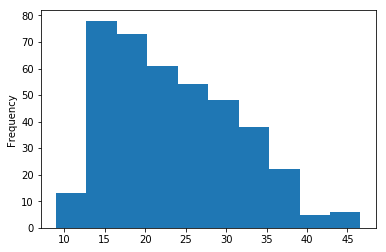

In [89]:
x.plot(kind="hist",x="mpg")

In [291]:
print ytr.shape

(318,)


In [56]:
sv.fit(Xtr,ytr)
print "acierto en train", sv.score(Xtr,ytr)
print "acierto en test ", sv.score(Xts,yts)



acierto en train 1.0
acierto en test  0.623115577889
